In [1]:
import numpy as np
import pandas as pd
from scipy import stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import mason_functions as mf

# Simulating Chuck a Luck

## "Pay a Buck and Chuck-a-Luck" 

[Chuck-a-Luck](https://en.wikipedia.org/wiki/Chuck-a-luck) is a game of chance often associated with charity fundraisers or street gambling rather than casinos. 

To play, the House says, "Pay 1 dollar, pick a number and roll 3 dice. If any of those dice come up, you'll win 1 dollar, 2 dollars, or 3 dollars."

> "It's even odds", they say, "because the probability of rolling your number is 1/6 and you get to roll 3 dice! 1/6 + 1/6 + 1/6 is 3/6 which is 1/2". 

You know better than this, so it's time to make an experiment to approximate the actual risk and payoff...

Rules:
- The player pays 1 dollar to play and picks a number.
- The House rolls 3 dice at once.

- Payouts:
  - 3 dollars if all three dice match the chosen number
  - 2 dollars if exactly two dice match the chosen number
  - 1 dollar if exactly one of the dice matches the chosen number
  - If none of the dice match the player's chosen number, then the House keeps the 1 dollar.

Exercises:
- What are your chances of getting an outcome payout of 2 dollars? (where we earned 3 dollars on the 1 dollar ante)
- What are your chances of getting an payout of 1 dollar?
- What are your chances of getting a payout of 0 dollars where you ante 1 dollar and win 1 dollar?
- What are your chances of getting a payout of -1 dollar where you ante up, but don't win anything?
- What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

- Is this really a fair game of 1/6 + 1/6 + 1/6 odds?
- If you play 1,000,000 games in a row, what are your winnings/losses?
- Chart out a histogram of all the outcomes of those 1,000,000 games




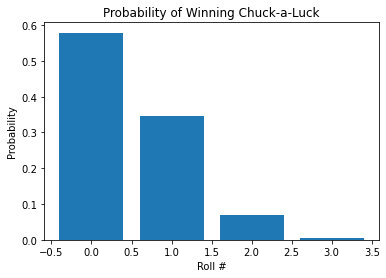

In [2]:
n_rolls = 3
p = (1/6)
dice = stats.binom(n_rolls, p)
x = np.arange(0, 4)
y = stats.binom(n_rolls, p).pmf(x)
plt.bar(x, y)
plt.title('Probability of Winning Chuck-a-Luck')
plt.xlabel('Roll #')
plt.ylabel('Probability');

In [3]:
payouts = pd.DataFrame({'payout_as_dollars':[-1, 0, 1, 2], 'probability': [
    dice.pmf(0),
    dice.pmf(1),
    dice.pmf(2),
    dice.pmf(3)]}, index = ['no_matches', 'one_match', 'two_matches', 'three_matches'])
payouts['payout_value'] = payouts.payout_as_dollars * payouts.probability
payouts.payout_value.mean()
print(f'The probability of rolling three matches (payout +$2) is {round((dice.pmf(3) * 100), 2)}%')
print(f'The probability of rolling two matches (payout +$1) is {round((dice.pmf(2) * 100), 1)}%')
print(f'The probability of rolling one match (payout +$0) is {round((dice.pmf(1) * 100), 1)}%')
print(f'The probability of rolling no matches (payout -$1) is {round((dice.pmf(0) * 100), 1)}%')
print(f'The average cost per game is {abs(round(payouts.payout_value.mean(), 3)) * 100} cents.')
print(f'This is not a fair game of 1/6 + 1/6 + 1/6 odds.')
print(f'If you play 1,000,000 games in a row, your losses are probably ${round(1_000_000 * -1 * payouts.payout_value.mean())}.')
print('--------------------------------------------------------------')
payouts

The probability of rolling three matches (payout +$2) is 0.46%
The probability of rolling two matches (payout +$1) is 6.9%
The probability of rolling one match (payout +$0) is 34.7%
The probability of rolling no matches (payout -$1) is 57.9%
The average cost per game is 12.5 cents.
This is not a fair game of 1/6 + 1/6 + 1/6 odds.
If you play 1,000,000 games in a row, your losses are probably $125000.
--------------------------------------------------------------


,payout_as_dollars,probability,payout_value
no_matches,-1,0.578704,-0.578704
one_match,0,0.347222,0.000000
two_matches,1,0.069444,0.069444
three_matches,2,0.004630,0.009259


In [4]:
λ = payouts.payout_value.mean()
λ

-0.125

In [5]:
n_dice = 3
n_trials = 1_000_000
chuck = np.random.choice([0, 1, 2, 3, 4, 5, 6], size = (n_trials, n_dice))
chuck = pd.DataFrame(chuck)

In [6]:
chuck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   0       1000000 non-null  int64
 1   1       1000000 non-null  int64
 2   2       1000000 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [7]:
chuck.columns = ['die_1', 'die_2', 'die_3']
chuck.head()

,die_1,die_2,die_3
0,4,0,5
1,1,0,1
2,0,6,3
3,0,5,5
4,2,6,0


In [11]:
chuck['match_1'] = chuck.die_1.apply(mf.is_two)

In [13]:
chuck['match_2'] = chuck.die_2.apply(mf.is_two)
chuck['match_3'] = chuck.die_3.apply(mf.is_two)

In [14]:
chuck.head()

,die_1,die_2,die_3,match_1,match_2,match_3
0,4,0,5,False,False,False
1,1,0,1,False,False,False
2,0,6,3,False,False,False
3,0,5,5,False,False,False
4,2,6,0,True,False,False
